In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
customers=pd.read_csv("C:/Users/Anamika/Downloads/Customers.csv")
products=pd.read_csv("C:/Users/Anamika/Downloads/Products.csv")
transactions=pd.read_csv("C:/Users/Anamika/Downloads/Transactions.csv")

In [19]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

In [20]:
# Aggregate transaction data
customer_features = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',         # Total quantity purchased
    'TotalValue': 'sum',       # Total transaction value
    'TransactionID': 'count',  # Total transactions
    'Region': 'first'          # Region
}).reset_index()

In [21]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [22]:
scaler = StandardScaler()
numeric_cols = ['Quantity', 'TotalValue', 'TransactionID']
customer_features[numeric_cols] = scaler.fit_transform(customer_features[numeric_cols])

In [23]:
# Extract features for clustering
features = customer_features.drop(columns=['CustomerID']).values

In [24]:
# Clustering with K-Means
num_clusters = 4  # Choose between 2 and 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:

# Assign cluster labels to customers
customer_features['Cluster'] = labels

In [26]:

# Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(features, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.220890947101179


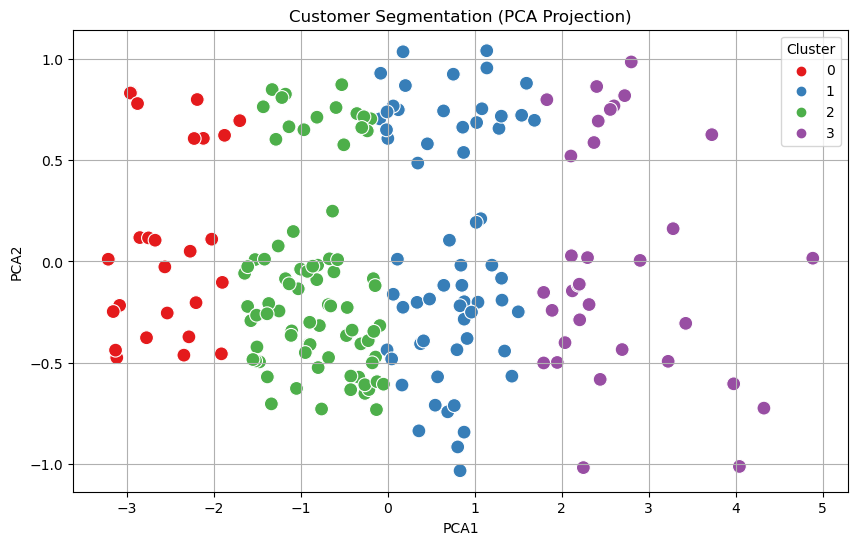

In [27]:
# Visualize Clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
customer_features['PCA1'] = pca_result[:, 0]
customer_features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='Set1', s=100
)
plt.title("Customer Segmentation (PCA Projection)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [28]:
# Analyze clusters
cluster_summary = customer_features.groupby('Cluster').agg({
    'Quantity': 'mean',
    'TotalValue': 'mean',
    'TransactionID': 'mean'
}).reset_index()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  Quantity  TotalValue  TransactionID
0        0 -1.469782   -1.432989      -1.484805
1        1  0.374933    0.432296       0.414674
2        2 -0.472757   -0.489047      -0.461722
3        3  1.596703    1.500680       1.508662
